# Import libres

In [114]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
from sklearn.linear_model import LinearRegression   , Lasso , Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

# Load Dataset 

In [92]:
df = pd.read_csv("Ice_cream selling data.csv")

# EDA

In [93]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [95]:
df.duplicated().sum()

0

In [96]:
df.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [97]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [98]:
px.box(df , x = "Ice Cream Sales (units)")

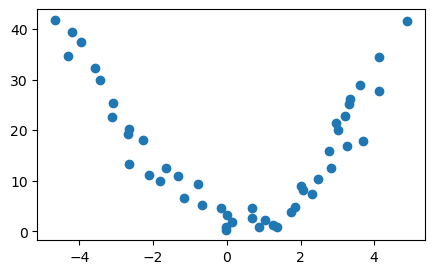

In [99]:
plt.figure(figsize=(5,3))
plt.scatter(df["Temperature (°C)"] , df["Ice Cream Sales (units)"])

# Split Data

In [100]:
x = df["Temperature (°C)"].values.reshape(-1,1)
y = df["Ice Cream Sales (units)"]

# Load model 

In [101]:
model = LinearRegression()

# Fit model

In [102]:
model.fit( x , y )

LinearRegression()

# model predict

In [103]:
y_pred = model.predict(x)

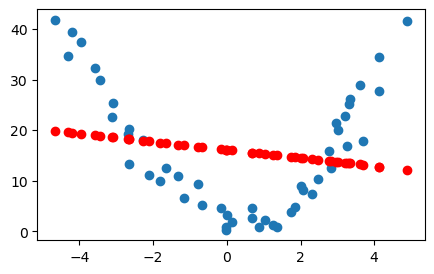

In [104]:
plt.figure(figsize=(5,3))
plt.scatter(df["Temperature (°C)"] , df["Ice Cream Sales (units)"])
plt.scatter(df["Temperature (°C)"]  , y_pred , color = "red")

# PolynomialFeatures

In [105]:
poly = PolynomialFeatures(degree= 20 )

In [106]:
poly.fit(x)

PolynomialFeatures(degree=20)

In [107]:
poly_x = poly.transform(x)

In [108]:
model_poly = LinearRegression()

In [109]:
model_poly.fit(poly_x , y)

LinearRegression()

In [110]:
model_poly.coef_

array([ 0.00000000e+00,  2.52973595e+00,  9.97856439e+00, -1.66721398e+01,
       -1.24181605e+01,  1.54142936e+01,  7.59103669e+00, -6.53929630e+00,
       -2.48095822e+00,  1.53462112e+00,  4.84882048e-01, -2.14149182e-01,
       -5.93857750e-02,  1.81418843e-02,  4.58895099e-03, -9.11653791e-04,
       -2.16438883e-04,  2.48674071e-05,  5.65730244e-06, -2.82013054e-07,
       -6.23786149e-08])

In [111]:
poly_pred = model_poly.predict(poly_x)

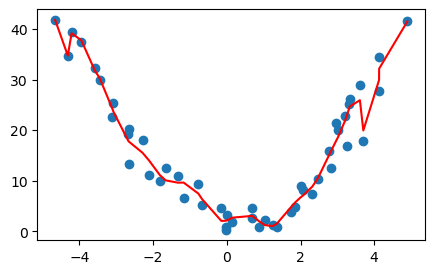

In [112]:
plt.figure(figsize=(5,3))
plt.scatter(df["Temperature (°C)"] , df["Ice Cream Sales (units)"])
plt.plot(df["Temperature (°C)"]  , poly_pred , color = "red")

In [138]:
ls = Lasso(alpha= 50000).fit(poly_x,y)
rd = Ridge(alpha= 50000).fit(poly_x,y)

C:\Users\AMIT\Documents\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.279e+03, tolerance: 7.220e-01

C:\Users\AMIT\Documents\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.04033e-24): result may not be accurate.



In [139]:
y_pred_ls = ls.predict(poly_x)
y_pred_rd = rd.predict(poly_x)

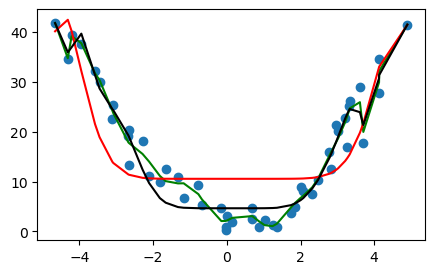

In [140]:
plt.figure(figsize=(5,3))
plt.scatter(df["Temperature (°C)"] , df["Ice Cream Sales (units)"])
plt.plot(df["Temperature (°C)"]  , poly_pred , color = "green")
plt.plot(df["Temperature (°C)"],y_pred_ls , color = "red")
plt.plot(df["Temperature (°C)"],y_pred_rd , color = "black")

In [141]:
ls.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  5.51202571e-05, -2.24792542e-06,
       -1.44222507e-06,  5.51966536e-08, -4.75713300e-08,  3.99869559e-09,
       -6.57402241e-10,  2.36966735e-11,  1.49582588e-11, -4.57531621e-12,
        1.75469253e-12])

In [142]:
rd.coef_

array([ 0.00000000e+00, -1.04070054e-03,  8.71376994e-04, -1.95860945e-03,
        2.65669442e-03, -3.78904304e-03,  6.56438378e-03, -5.51976274e-03,
        1.04833548e-02, -2.46255717e-03,  2.85387030e-03,  6.40483183e-04,
       -1.50250306e-03, -1.77045827e-05,  2.20070581e-04, -4.10715521e-06,
       -1.52136002e-05,  3.07226054e-07,  5.12227463e-07, -5.96281382e-09,
       -6.73901947e-09])